### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#First define the data
file_name = 'The E-commerce Dataset.csv'
data = pd.read_csv(file_name)
#data.head() #Optional to understand shape of data

In [4]:
#Need to remove records where:
#1. gender/rating.helpfulness is missing
#2. review is 'none'

clean_data = data.dropna(subset = ['gender', 'rating', 'helpfulness']) #dropna method removes records with missing records for given columns
clean_data = clean_data[clean_data.review != 'none'] #Extra records from clean_data where review is not 'none'

In [5]:
#Now we need to display the dataframe with the number of null values in each column and the length of the data, both before and after cleaning

#Get count of null records using isnull() and sum() methods
null_count = data.isnull().sum()
clean_null_count = clean_data.isnull().sum()

#Get length of data using len() function call 
data_length = len(data)
clean_data_length = len(clean_data)

#Print dataframes of data before and after
print("Null counts in original data:")
print(null_count)
print("\nNull counts in cleaned data:")
print(clean_null_count)

#Finally print data length before and after
print("\nData size before cleaning is: " + str(data_length) + "\nData size after cleaning is: " + str(clean_data_length) +".")
print(str(data_length - clean_data_length) + " records have been removed after cleaning.")

Null counts in original data:
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

Null counts in cleaned data:
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

Data size before cleaning is: 20000
Data size after cleaning is: 19916.
84 records have been removed after cleaning.


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [9]:
# Q2.1 total number of unique users, unique reviews, unique items, and unique categories
chosen_columns = ['userId', 'review', 'item', 'category']
unique_counts = clean_data[chosen_columns].nunique() #Use nunique() method to get a dataframe displaying unique records for chosen columns

print(unique_counts)
print("\nTotal unique records across chosen columns: " + str(unique_counts.sum()) + ".")

userId       8562
review      19459
item           89
category        9
dtype: int64

Total unique records across chosen columns: 28119.


In [23]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
ratings = clean_data.rating
print("Descriptive statistics for all rating records:")
ratings.describe().round(2) #Rounded for better readability

Descriptive statistics for all rating records:


count    19916.0
mean         3.7
std          1.4
min          1.0
25%          3.0
50%          4.0
75%          5.0
max          5.0
Name: rating, dtype: float64

In [27]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
#First define dataframes for each gender
males = clean_data[clean_data.gender == 'M']
females = clean_data[clean_data.gender == 'F']

#Now display descriptive statistics for the ratings of each gender
print("Descriptive statistics for the number of items rated by males:")
print(males.rating.describe().round(2))
print("\nDescriptive statistics for the number of items rated by females:")
print(females.rating.describe().round(2))

Descriptive statistics for the number of items rated by males:
count    10123.00
mean         3.69
std          1.41
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: rating, dtype: float64

Descriptive statistics for the number of items rated by females:
count    9793.00
mean        3.72
std         1.40
min         1.00
25%         3.00
50%         4.00
75%         5.00
max         5.00
Name: rating, dtype: float64


In [29]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 
#I asked two people how to answer this question and they gave me different responses. I decided to answer for both approaches
#Show output for all 89 distinct items - Yasmin Lee:
clean_data.groupby('item').rating.describe()

# #Tutor answer:
rated_item_num = clean_data.groupby(['item'])['rating'].count().reset_index(name='count')
rated_item_num.head()
rated_item_num['count'].describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

So we need to explore the correlation between gender, helpfulness, category, and rating. There are many different relationships to analyse, and numerous visualisation methods will have to be explored to ensure optimal presentation and insight. I will also attempt to use other graphical ackages like seaborn as recommended in the lectures.

In [30]:
clean_data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


Before starting, it's good to get an idea of what the data looks like.

In [16]:
#First, as suggested, lets look at the relationship between gender and rating
males_avg_rating = males.rating.mean()
females_avg_rating = females.rating.mean()
print(str(males_avg_rating), str(females_avg_rating))
print("On average, females give a higher rating than males by " + str(females_avg_rating - males_avg_rating) +'.')

3.6866541539069444 3.71745124068212
On average, females give a higher rating than males by 0.030797086775175675.


We make a simple observation of the mean of ratings between males and females. Let's try to display this using boxplots for more insight.

Text(0, 0.5, 'Rating')

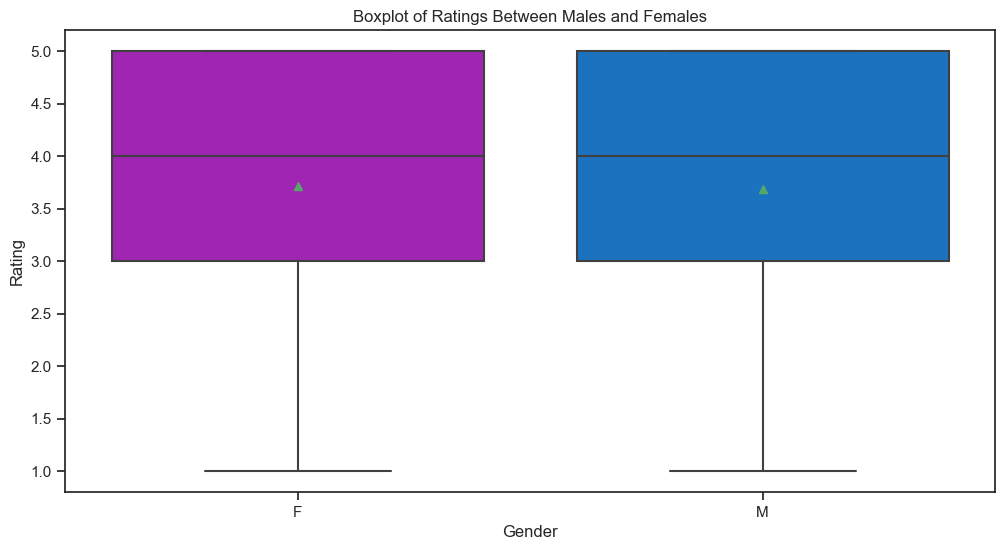

In [17]:
#Display data as two boxplots with seaborn package
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(12, 6))

gender_colors = {"M": "#0074D9", "F": "#B10DC9"} #Just to make it look nicer
sns.boxplot(data=clean_data, x='gender', y='rating', showmeans=True, palette = gender_colors)

#Labels
plt.title("Boxplot of Ratings Between Males and Females")
plt.xlabel("Gender")
plt.ylabel("Rating")

The boxplots show that the data for male and female ratings is very similar. For both genders, the top 75% of data lies above 3, meaning that most individuals regardless of gender provide above average ratings. This is reinforced thanks to the aforementioned gender meanings lying close to 3.7. 

However, is this distribution maintained when looking across different categories?

<Figure size 2000x2000 with 0 Axes>

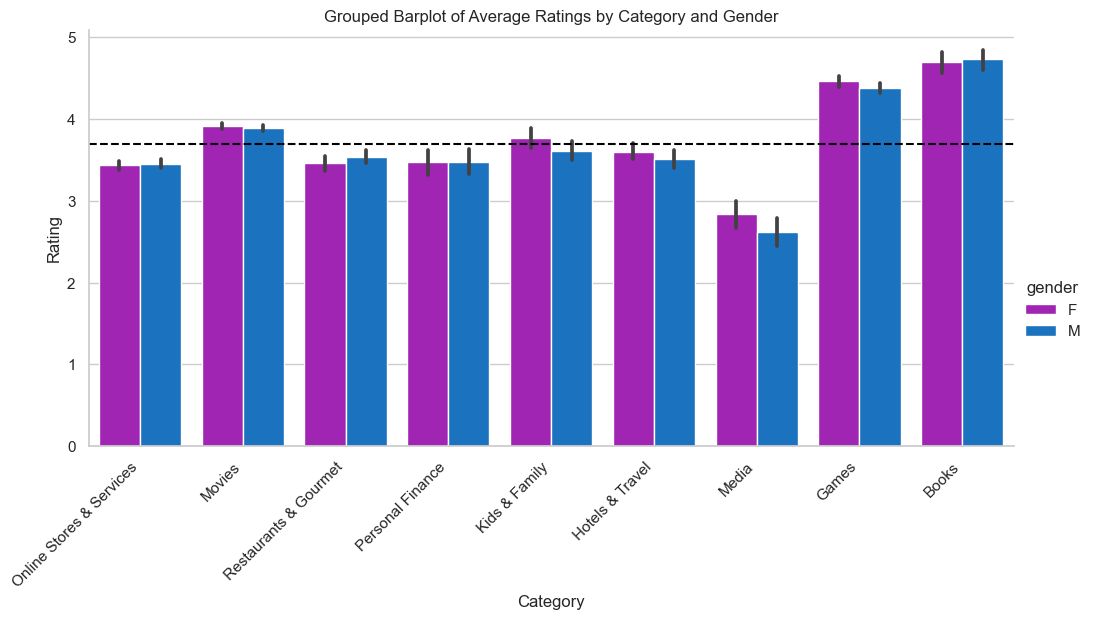

In [18]:
#Display data with grouped barplots using seaborn package
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 20))

#Make plot
gender_colors = {"M": "#0074D9", "F": "#B10DC9"}
bp = sns.catplot(data=clean_data, kind='bar', x='category', y='rating', hue='gender', aspect=2, palette = gender_colors)

#Add labels
plt.title("Grouped Barplot of Average Ratings by Category and Gender")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right') #Rotate categories so they fit

#Add mean rating line
mean_rating = clean_data['rating'].mean()
plt.axhline(y=mean_rating, color='black', linestyle='--', label='Mean Overall Rating')

The graph above shows the average rating per gender per category. Despite most bars being below the mean rating, the mean rating is significantly brought up by the games and books categories, both of which being th eonly categories with an average rating above 4. Otherwise, the movies category and only the kids & family category for women are above the mean rating line.

Overall, all the bar graphs have a very similar distribution among both gender, with the most significant difference being in the media category, although only to a small margin. 

To conclude, we can see varying rating levels among different categories, yet not much variation when comparing each category between men and women. This information can be used to identify which areas for the firm to invest more time in. 

One more relationships I'd like to investigate is between rating, helpfulness, and category. I want to test whether more helpful products receive better ratings, and whether certain categories are considered more helpful than others.

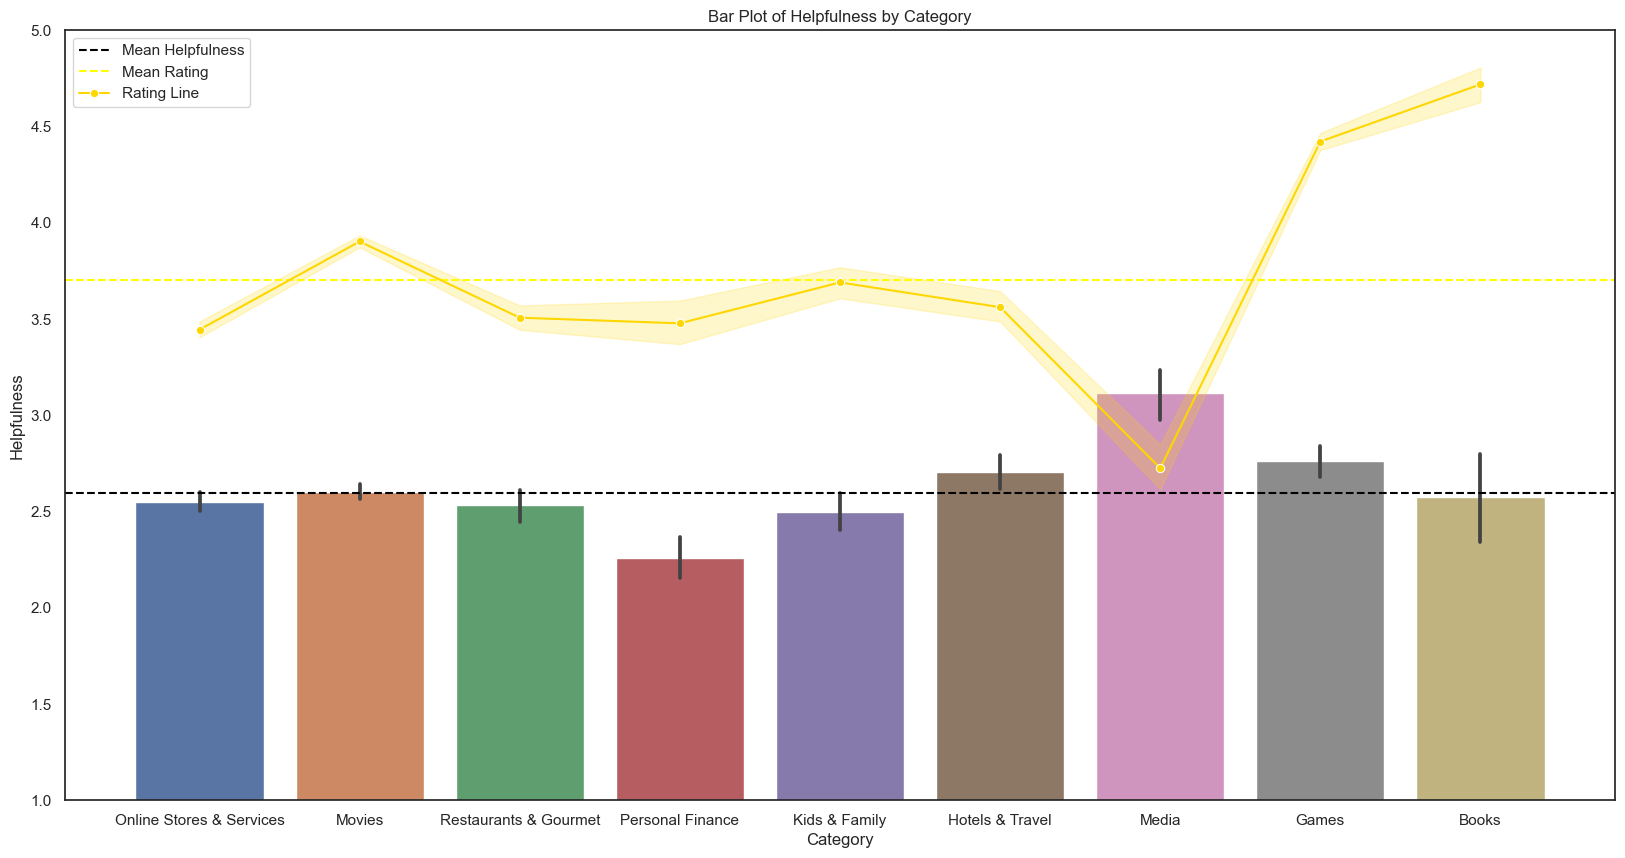

In [19]:
#Initial layout
sns.set_theme(style="white", palette=None)
plt.figure(figsize=(20, 10))
bp = sns.barplot(data=clean_data, x='category', y='helpfulness') #Barplot for category and helpfulness

#Labels
plt.title("Bar Plot of Helpfulness by Category")
plt.xlabel("Category")
plt.ylabel("Helpfulness")
plt.ylim(1, 5) #Set y limit to range of rating/helpfulness

#Add mean lines for helpfulness and raiting
mean_helpfulness = clean_data['helpfulness'].mean()
mean_rating = clean_data['rating'].mean()
plt.axhline(y=mean_helpfulness, color='black', linestyle='--', label='Mean Helpfulness')
plt.axhline(y=mean_rating, color='yellow', linestyle='--', label='Mean Rating')

# Create the rating_line and specify the label
raiting_line = sns.lineplot(data=clean_data, x='category', y='rating', color='gold', marker='o', ax=bp, label='Rating Line')

# Add legend
bp.legend()

First, let's look at the relationship between categories and helpfulness. The average helpfulness is approximately 2.6, of which most categories are close to. However, personal finance is significantly below this mean. Conversely, media is found to be exceptionally helpful. 

Once we look at the ratings as well, we see that despite personal finance being the least helpful category, it still falls in line with the mean rating. Most categories have a similar helpfulness to rating ratio, however, despite mdeia being exceptionally helpful, it is the category with the lowest rating. On the other hand, although games and books are nearly average in helpfulness, they are the two top categories by rating.

These are some interesting results and will require further statistical research to determine key findings.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [79]:
#Remove records where:
#1. Helpfulness is <=2
#2. Users with <7 ratings
#3. Items with <10 ratings

#First keep records with helpfulness >2
filtered_data = clean_data[clean_data['helpfulness'] > 2]

#Next remove records with users who have <7 ratings
user_ratings = filtered_data.groupby('userId').rating.count().reset_index(name='count') #Get user ratings count
user_outliers = user_ratings[user_ratings['count'] < 7].userId.tolist() #Determine which users are outliers
user_outlier_index = filtered_data.index[filtered_data.userId.isin(user_outliers)] #Get the indexes of records with outlier users
filtered_data = filtered_data.drop(user_outlier_index) #Drop outlier records

#Finally remove items with <10 ratings, same method as before.
item_ratings = filtered_data.groupby('item_id').rating.count().reset_index(name='count') #Get user ratings count
item_outliers = item_ratings[item_ratings['count'] < 11].item_id.tolist()
item_outlier_index = filtered_data.index[filtered_data.item_id.isin(item_outliers)]
filtered_data = filtered_data.drop(item_outlier_index)

print("Previously data length was: " + str(len(clean_data)) +'.')
print("After removing outliers, data length became: " +str(len(filtered_data)) +".")
print("In total, " + str(len(clean_data) - len(filtered_data)) +" records were removed.")

Previously data length was: 19916.
After removing outliers, data length became: 2685.
In total, 17231 records were removed.
